In [ ]:
#Utilize PCA to demonstrate how essential variables can be acquired from the cancer dataset available from sklearn.datasets

In [59]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from io import StringIO

In [77]:
# Loading and parsing the CSV data
df = pd.read_csv("Cancer_Dataset.csv")


In [73]:
df

Column1 Column2  Column3  Column4  Column5  Column6  Column7  Column8  \
0      842302       M    17.99    10.38   122.80   1001.0  0.11840  0.27760   
1      842517       M    20.57    17.77   132.90   1326.0  0.08474  0.07864   
2    84300903       M    19.69    21.25   130.00   1203.0  0.10960  0.15990   
3    84348301       M    11.42    20.38    77.58    386.1  0.14250  0.28390   
4    84358402       M    20.29    14.34   135.10   1297.0  0.10030  0.13280   
..        ...     ...      ...      ...      ...      ...      ...      ...   
564    926424       M    21.56    22.39   142.00   1479.0  0.11100  0.11590   
565    926682       M    20.13    28.25   131.20   1261.0  0.09780  0.10340   
566    926954       M    16.60    28.08   108.30    858.1  0.08455  0.10230   
567    927241       M    20.60    29.33   140.10   1265.0  0.11780  0.27700   
568     92751       B     7.76    24.54    47.92    181.0  0.05263  0.04362   

     Column9  Column10  ...  Column23  Column24  Column25  Column26  Column27  \
0    0.30010   0.14710  ...    25.380     17.33    184.60    2019.0   0.16220   
1    0.08690   0.07017  ...    24.990     23.41    158.80    1956.0   0.12380   
2    0.19740   0.12790  ...    23.570     25.53    152.50    1709.0   0.14440   
3    0.24140   0.10520  ...    14.910     26.50     98.87     567.7   0.20980   
4    0.19800   0.10430  ...    22.540     16.67    152.20    1575.0   0.13740   
..       ...       ...  ...       ...       ...       ...       ...       ...   
564  0.24390   0.13890  ...    25.450     26.40    166.10    2027.0   0.14100   
565  0.14400   0.09791  ...    23.690     38.25    155.00    1731.0   0.11660   
566  0.09251   0.05302  ...    18.980     34.12    126.70    1124.0   0.11390   
567  0.35140   0.15200  ...    25.740     39.42    184.60    1821.0   0.16500   
568  0.00000   0.00000  ...     9.456     30.37     59.16     268.6   0.08996   

     Column28  Column29  Column30  Column31  Column32  
0     0.66560    0.7119    0.2654    0.4601   0.11890  
1     0.18660    0.2416    0.1860    0.2750   0.08902  
2     0.42450    0.4504    0.2430    0.3613   0.08758  
3     0.86630    0.6869    0.2575    0.6638   0.17300  
4     0.20500    0.4000    0.1625    0.2364   0.07678  
..        ...       ...       ...       ...       ...  
564   0.21130    0.4107    0.2216    0.2060   0.07115  
565   0.19220    0.3215    0.1628    0.2572   0.06637  
566   0.30940    0.3403    0.1418    0.2218   0.07820  
567   0.86810    0.9387    0.2650    0.4087   0.12400  
568   0.06444    0.0000    0.0000    0.2871   0.07039  

[569 rows x 32 columns]

In [79]:
# Preprocessing: Separate features and labels
# Assuming Column1 is ID, Column2 is diagnosis, and Columns 3-32 are features
X = df.iloc[:,2:32].values #Numerical features
Y = df['Column2'].values  #Diagnosis

In [83]:
#the missing data is handled here
X = np.where(np.isnan(X),np.nanmean(X,axis=0),X)

In [85]:
#the features are standardized as follows
scaler = StandardScaler()
X_scaled =scaler.fit_transform(X)

In [87]:
#Applying principal component analysis
pca = PCA()
X_pca =pca.fit_transform(X_scaled)

In [89]:
#calculating the variance ratios
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance =np.cumsum(explained_variance_ratio)

In [93]:
#visualization
plt.figure(figsize =(12,5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

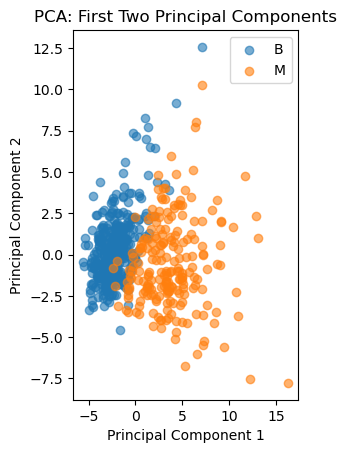

In [101]:
#plotting scatter plot of the first two pricipal components
plt.subplot(1,2,1)
for label in np.unique(Y):
    mask = Y ==label
    plt.scatter(X_pca[mask,0],X_pca[mask,1],label=label,alpha =0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: First Two Principal Components')
plt.legend()    

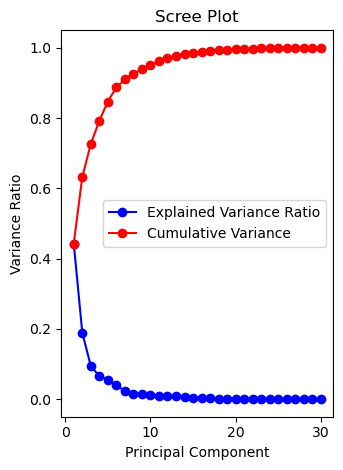

In [103]:
#plotting scree plot
plt.subplot(1, 2, 2)
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'bo-', label='Explained Variance Ratio')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'ro-', label='Cumulative Variance')
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.title('Scree Plot')
plt.legend()

plt.tight_layout()


In [107]:
# Printing explained variance ratios for the first few components
print("Explained Variance Ratios for first 5 components:")
for i, ratio in enumerate(explained_variance_ratio[:5], 1):
    print(f"PC{i}: {ratio:.4f} (Cumulative: {cumulative_variance[i-1]:.4f})")

Explained Variance Ratios for first 5 components:
PC1: 0.4427 (Cumulative: 0.4427)
PC2: 0.1897 (Cumulative: 0.6324)
PC3: 0.0939 (Cumulative: 0.7264)
PC4: 0.0660 (Cumulative: 0.7924)
PC5: 0.0550 (Cumulative: 0.8473)


In [111]:
# Identifying essential variables (features with high loadings in PC1 and PC2)
components = pd.DataFrame(pca.components_, columns=df.columns[2:32], index=[f'PC{i+1}' for i in range(pca.n_components_)])
print("\nTop contributing features for PC1 and PC2:")
for pc in ['PC1', 'PC2']:
    print(f"\n{pc}:")
    loadings = components.loc[pc].abs().sort_values(ascending=False)
    print(loadings.head(5))


Top contributing features for PC1 and PC2:

PC1:
Column10    0.260854
Column9     0.258400
Column30    0.250886
Column8     0.239285
Column25    0.236640
Name: PC1, dtype: float64

PC2:
Column12    0.366575
Column22    0.280092
Column32    0.275339
Column3     0.233857
Column18    0.232716
Name: PC2, dtype: float64


In [ ]:
# To Reduce the dataset into two PCA components, we will need to modify the some parts of the code above so that the PCA can then be applied with two components